In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Se guarda el dataset en una variable (df_meta) y mostramos las 5 primeras filas y todas sus columnas.
df_meta = pd.read_csv('REPORTE-XPLORA-MAYO-2024-AGOSTO-2025.csv')
pd.set_option('display.max_columns', None)
df_meta[df_meta['Objetivo']=='OUTCOME_SALES']


,Nombre de la campaña,Identificador de la campaña,Nombre del conjunto de anuncios,Identificador del conjunto de anuncios,Nombre del anuncio,Identificador del anuncio,Mes,Objetivo,Edad,Sexo,Llamada a la acción,Tipo de resultado,Resultados,Importe gastado (COP),Alcance,Impresiones,Costo por resultado,Clics en el enlace,CPC (costo por clic en el enlace),CPM (costo por mil impresiones),CTR (todos),Conversaciones con mensajes iniciadas,Frecuencia,Inicio del informe,Fin del informe
72,Xiudad MAYO campaña de Ventas 25 DE MAYO 50 mill,120209561408620362,Xiudad MAYO campaña de Ventas 25 DE MAYO,120209561408640362,Xiudad MAYO campaña de Ventas 25 DE MAYO,120209561408660362,2024-06-01 - 2024-06-30,OUTCOME_SALES,55-64,male,MESSAGE_PAGE,NaN,NaN,645631,NaN,122289,NaN,3043.0,212.169241,5279.550900,4.195798,NaN,NaN,2024-06-01,2024-06-30
73,Xiudad MAYO campaña de Ventas 25 DE MAYO 50 mill,120209561408620362,Xiudad MAYO campaña de Ventas 25 DE MAYO,120209561408640362,Xiudad MAYO campaña de Ventas 25 DE MAYO,120209561408660362,2024-06-01 - 2024-06-30,OUTCOME_SALES,45-54,male,MESSAGE_PAGE,NaN,NaN,119729,NaN,27666,NaN,557.0,214.953321,4327.658498,3.614545,NaN,NaN,2024-06-01,2024-06-30
74,Xiudad MAYO campaña de Ventas 25 DE MAYO 50 mill,120209561408620362,Xiudad MAYO campaña de Ventas 25 DE MAYO,120209561408640362,Xiudad MAYO campaña de Ventas 25 DE MAYO,120209561408660362,2024-06-01 - 2024-06-30,OUTCOME_SALES,35-44,male,MESSAGE_PAGE,NaN,NaN,49893,NaN,10300,NaN,236.0,211.411017,4843.980583,4.262136,NaN,NaN,2024-06-01,2024-06-30
75,Xiudad MAYO campaña de Ventas 25 DE MAYO 50 mill,120209561408620362,Xiudad MAYO campaña de Ventas 25 DE MAYO,120209561408640362,Xiudad MAYO campaña de Ventas 25 DE MAYO,120209561408660362,2024-06-01 - 2024-06-30,OUTCOME_SALES,55-64,female,MESSAGE_PAGE,NaN,NaN,403401,NaN,45815,NaN,1737.0,232.240069,8804.998363,5.860526,NaN,NaN,2024-06-01,2024-06-30
76,Xiudad MAYO campaña de Ventas 25 DE MAYO 50 mill,120209561408620362,Xiudad MAYO campaña de Ventas 25 DE MAYO,120209561408640362,Xiudad MAYO campaña de Ventas 25 DE MAYO,120209561408660362,2024-06-01 - 2024-06-30,OUTCOME_SALES,65+,male,MESSAGE_PAGE,NaN,NaN,1775294,NaN,219391,NaN,6729.0,263.827315,8091.918082,4.885797,NaN,NaN,2024-06-01,2024-06-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215,ejecutivo xplora 2025,120225312763360362,ejecutivo xplora 2025,120225312763380362,ejecutivo xplora 2025,120225312763400362,2025-05-01 - 2025-05-31,OUTCOME_SALES,45-54,unknown,WHATSAPP_MESSAGE,NaN,NaN,82,NaN,19,NaN,1.0,82.000000,4315.789474,5.263158,NaN,NaN,2025-05-01,2025-05-31
2216,ejecutivo xplora 2025,120225312763360362,ejecutivo xplora 2025,120225312763380362,ejecutivo xplora 2025,120225312763400362,2025-05-01 - 2025-05-31,OUTCOME_SALES,25-34,unknown,WHATSAPP_MESSAGE,NaN,NaN,193,NaN,21,NaN,NaN,NaN,9190.476190,0.000000,NaN,NaN,2025-05-01,2025-05-31
2217,ejecutivo xplora 2025,120225312763360362,ejecutivo xplora 2025,120225312763380362,ejecutivo xplora 2025,120225312763400362,2025-05-01 - 2025-05-31,OUTCOME_SALES,55-64,unknown,WHATSAPP_MESSAGE,NaN,NaN,2,NaN,1,NaN,NaN,NaN,2000.000000,0.000000,NaN,NaN,2025-05-01,2025-05-31
2218,ejecutivo xplora 2025,120225312763360362,ejecutivo xplora 2025,120225312763380362,ejecutivo xplora 2025,120225312763400362,2025-05-01 - 2025-05-31,OUTCOME_SALES,35-44,unknown,WHATSAPP_MESSAGE,NaN,NaN,268,NaN,14,NaN,NaN,NaN,19142.857143,0.000000,NaN,NaN,2025-05-01,2025-05-31


### DICCIONARIO DE DATOS
0. Nombre de la campaña: Nombre asignado a la campaña en Meta , (Tipo de variable = Categórica )
1. Identificador de la campaña: ID único de la campaña, (Tipo de variable = Númerica)
2. Nombre del conjunto de anuncios: Nombre asignado al conjunto de anuncios de la campaña en Meta Ads, (Tipo de variable = Categórica)
3. Identificador del conjunto de anuncios: ID único del conjunto de anuncios, (Tipo de variable = Númerica)
4. Nombre del anuncio: Nombre asignado al anuncio en el conjunto de anuncios en Meta Ads, (Tipo de variable = Categórica)
5. Identificador del anuncio: ID único del anuncio, (Tipo de variable = Númerica)
6. Mes: Período de duración del conjunto de anuncios/anuncio, (Tipo de variable = Categórica)
7. Objetivo: Objetivo de la campaña (ventas, clientes potenciales, mensajes, etc), (Tipo de variable = Categórica)
8. Edad: Rango de edades con las cuales se segmentó el conjunto de anuncios, (Tipo de variable = Categórica)
9. Sexo: Segmento de género para cada conjunto de anuncios, (Tipo de variable = Categórica)
10. Llamada a la acción: Botón usado para motivar al usuario a realizar una acción, (Tipo de variable = Categórica)
11. Tipo de resultado: Tipo de conversión medida, (Tipo de variable = Categórica)
12. Resultados: Cantidad de conversiones logradas, (Tipo de variable = Númerica)
13. Importe gastado (COP): Monto invertido en campaña/conjunto de anuncios/anuncios, (Tipo de variable = Númerica)
14. Alcance: Personas únicas alcanzadas, (Tipo de variable = Númerica)
15. Impresiones: Número total de veces que se mostró un anuncio, (Tipo de variable = Númerica)
16. Costo por resultado: Costo promedio por conversión, (Tipo de variable = Númerica)
17. Clics en el enlace: Número de clic en el anuncio, (Tipo de variable = Númerica)
18. CPC (costo por clic en el enlace):Costo promedio por clic, (Tipo de variable = Númerica)
19. CPM (costo por mil impresiones): Costo promedio por mil impresiones, (Tipo de variable = Númerica)
20. CTR (todos): Porcentaje de clics sobre impresiones, (Tipo de variable = Númerica)
21. Conversaciones con mensajes iniciadas: Conversaciones de Whatsapp iniciadas, (Tipo de variable = Númerica)
22. Frecuencia: Promedio de veces que una persona vio el anuncio, (Tipo de variable = Númerica)
23. Inicio del informe: Fecha inicial del reporte, (Tipo de variable = Categórica)
24. Fin del informe: Fecha final del reporte, (Tipo de variable = Categórica)

In [3]:
#Se observa cuántas filas y columans tiene el dataset.
df_meta.shape

(2220, 25)

In [4]:
#Se observa información básica sobre cada columna como índice, nombre, cantidad de no nulos, tipo de dato
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2220 entries, 0 to 2219
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Nombre de la campaña                    2220 non-null   object 
 1   Identificador de la campaña             2220 non-null   int64  
 2   Nombre del conjunto de anuncios         2220 non-null   object 
 3   Identificador del conjunto de anuncios  2220 non-null   int64  
 4   Nombre del anuncio                      2220 non-null   object 
 5   Identificador del anuncio               2220 non-null   int64  
 6   Mes                                     2220 non-null   object 
 7   Objetivo                                2220 non-null   object 
 8   Edad                                    2220 non-null   object 
 9   Sexo                                    2220 non-null   object 
 10  Llamada a la acción                     2220 non-null   obje

#### Observamos algunas columnas que no tienen datos como Alcance, Conversaciones con mensajes iniciadas, Frecuencia

In [5]:
df_meta.describe()

,Identificador de la campaña,Identificador del conjunto de anuncios,Identificador del anuncio,Resultados,Importe gastado (COP),Alcance,Impresiones,Costo por resultado,Clics en el enlace,CPC (costo por clic en el enlace),CPM (costo por mil impresiones),CTR (todos),Conversaciones con mensajes iniciadas,Frecuencia
count,2.220000e+03,2.220000e+03,2.220000e+03,945.000000,2.220000e+03,0.0,2220.000000,945.000000,1610.000000,1610.000000,2.218000e+03,2218.000000,0.0,0.0
mean,1.202129e+17,1.202129e+17,1.202130e+17,3132.437037,5.321890e+04,NaN,8427.134234,8611.179909,87.513043,1250.976298,1.319606e+04,2.479121,NaN,NaN
std,2.850898e+12,2.844071e+12,2.869186e+12,10872.437242,1.384968e+05,NaN,22194.363144,10953.707613,278.117998,1191.727800,5.142396e+04,6.280554,NaN,NaN
min,1.202089e+17,1.202090e+17,1.202091e+17,1.000000,0.000000e+00,NaN,0.000000,0.000000,1.000000,11.000000,0.000000e+00,0.000000,NaN,NaN
25%,1.202108e+17,1.202108e+17,1.202108e+17,2.000000,5.457500e+02,NaN,60.000000,1267.500000,4.000000,550.141129,5.817939e+03,0.152860,NaN,NaN
50%,1.202128e+17,1.202128e+17,1.202130e+17,10.000000,6.385000e+03,NaN,593.500000,6134.000000,17.000000,1003.891304,9.466273e+03,1.479588,NaN,NaN
75%,1.202147e+17,1.202147e+17,1.202147e+17,81.000000,3.339200e+04,NaN,5261.000000,10896.666667,57.000000,1558.076230,1.446128e+04,2.990636,NaN,NaN
max,1.202253e+17,1.202253e+17,1.202253e+17,153713.000000,1.775294e+06,NaN,260652.000000,104150.000000,6729.000000,17947.000000,2.243375e+06,200.000000,NaN,NaN


#### Las 3 primeras columnas no las podemos analizar puesto que son ID's, por otro lado, los valores de resultados pueden ser bastante variables dependiendo del objetivo de la campaña al igual que el costo por resultado puede variar bastante dependiendo de si el anuncio trae bastantes resultados

In [6]:
# Conocer cantidad de nulos por columna
df_meta.isnull().sum()

Nombre de la campaña                         0
Identificador de la campaña                  0
Nombre del conjunto de anuncios              0
Identificador del conjunto de anuncios       0
Nombre del anuncio                           0
Identificador del anuncio                    0
Mes                                          0
Objetivo                                     0
Edad                                         0
Sexo                                         0
Llamada a la acción                          0
Tipo de resultado                         1275
Resultados                                1275
Importe gastado (COP)                        0
Alcance                                   2220
Impresiones                                  0
Costo por resultado                       1275
Clics en el enlace                         610
CPC (costo por clic en el enlace)          610
CPM (costo por mil impresiones)              2
CTR (todos)                                  2
Conversacione

In [7]:
#Mostrar las columnas para poder crear un data frame (df_meta_subset) donde no aparezcan las columnas que no tienen valores
#o no son relevantes
df_meta.columns

Index(['Nombre de la campaña', 'Identificador de la campaña',
       'Nombre del conjunto de anuncios',
       'Identificador del conjunto de anuncios', 'Nombre del anuncio',
       'Identificador del anuncio', 'Mes', 'Objetivo', 'Edad', 'Sexo',
       'Llamada a la acción', 'Tipo de resultado', 'Resultados',
       'Importe gastado (COP)', 'Alcance', 'Impresiones',
       'Costo por resultado', 'Clics en el enlace',
       'CPC (costo por clic en el enlace)', 'CPM (costo por mil impresiones)',
       'CTR (todos)', 'Conversaciones con mensajes iniciadas', 'Frecuencia',
       'Inicio del informe', 'Fin del informe'],
      dtype='object')

In [8]:
df_meta_subset = df_meta[['Nombre de la campaña', 'Identificador de la campaña',
       'Nombre del conjunto de anuncios',
       'Identificador del conjunto de anuncios', 'Nombre del anuncio',
       'Identificador del anuncio', 'Mes', 'Objetivo', 'Edad', 'Sexo',
       'Llamada a la acción', 'Tipo de resultado', 'Resultados',
       'Importe gastado (COP)', 'Impresiones',
       'Costo por resultado', 'Clics en el enlace',
       'CPC (costo por clic en el enlace)', 'CPM (costo por mil impresiones)',
       'CTR (todos)']]
df_meta_subset.head()

,Nombre de la campaña,Identificador de la campaña,Nombre del conjunto de anuncios,Identificador del conjunto de anuncios,Nombre del anuncio,Identificador del anuncio,Mes,Objetivo,Edad,Sexo,Llamada a la acción,Tipo de resultado,Resultados,Importe gastado (COP),Impresiones,Costo por resultado,Clics en el enlace,CPC (costo por clic en el enlace),CPM (costo por mil impresiones),CTR (todos)
0,Xiudad | MAYO | INTERACCIÓN - 13 MAYO 2024,120208939348690362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209021784370362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209056012500362,2024-05-03 - 2024-05-31,OUTCOME_ENGAGEMENT,55-64,male,WHATSAPP_MESSAGE,NaN,NaN,26,6,NaN,NaN,NaN,4333.333333,0.000000
1,Xiudad | MAYO | INTERACCIÓN - 13 MAYO 2024,120208939348690362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209021784370362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209056012500362,2024-06-01 - 2024-06-30,OUTCOME_ENGAGEMENT,35-44,male,WHATSAPP_MESSAGE,NaN,NaN,9581,794,NaN,5.0,1916.2,12066.750630,1.763224
2,Xiudad | MAYO | INTERACCIÓN - 13 MAYO 2024,120208939348690362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209021784370362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209056012500362,2024-05-03 - 2024-05-31,OUTCOME_ENGAGEMENT,25-34,male,WHATSAPP_MESSAGE,NaN,NaN,935,86,NaN,1.0,935.0,10872.093023,1.162791
3,Xiudad | MAYO | INTERACCIÓN - 13 MAYO 2024,120208939348690362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209021784370362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209056012500362,2024-05-03 - 2024-05-31,OUTCOME_ENGAGEMENT,35-44,male,WHATSAPP_MESSAGE,NaN,NaN,983,71,NaN,2.0,491.5,13845.070423,5.633803
4,Xiudad | MAYO | INTERACCIÓN - 13 MAYO 2024,120208939348690362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209021784370362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209056012500362,2024-05-03 - 2024-05-31,OUTCOME_ENGAGEMENT,45-54,male,WHATSAPP_MESSAGE,NaN,NaN,866,42,NaN,2.0,433.0,20619.047619,7.142857


In [9]:
df_meta_subset.isnull().sum()

Nombre de la campaña                         0
Identificador de la campaña                  0
Nombre del conjunto de anuncios              0
Identificador del conjunto de anuncios       0
Nombre del anuncio                           0
Identificador del anuncio                    0
Mes                                          0
Objetivo                                     0
Edad                                         0
Sexo                                         0
Llamada a la acción                          0
Tipo de resultado                         1275
Resultados                                1275
Importe gastado (COP)                        0
Impresiones                                  0
Costo por resultado                       1275
Clics en el enlace                         610
CPC (costo por clic en el enlace)          610
CPM (costo por mil impresiones)              2
CTR (todos)                                  2
dtype: int64

In [10]:
df_meta_subset[df_meta_subset['Resultados'].isnull()]

,Nombre de la campaña,Identificador de la campaña,Nombre del conjunto de anuncios,Identificador del conjunto de anuncios,Nombre del anuncio,Identificador del anuncio,Mes,Objetivo,Edad,Sexo,Llamada a la acción,Tipo de resultado,Resultados,Importe gastado (COP),Impresiones,Costo por resultado,Clics en el enlace,CPC (costo por clic en el enlace),CPM (costo por mil impresiones),CTR (todos)
0,Xiudad | MAYO | INTERACCIÓN - 13 MAYO 2024,120208939348690362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209021784370362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209056012500362,2024-05-03 - 2024-05-31,OUTCOME_ENGAGEMENT,55-64,male,WHATSAPP_MESSAGE,NaN,NaN,26,6,NaN,NaN,NaN,4333.333333,0.000000
1,Xiudad | MAYO | INTERACCIÓN - 13 MAYO 2024,120208939348690362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209021784370362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209056012500362,2024-06-01 - 2024-06-30,OUTCOME_ENGAGEMENT,35-44,male,WHATSAPP_MESSAGE,NaN,NaN,9581,794,NaN,5.0,1916.2,12066.750630,1.763224
2,Xiudad | MAYO | INTERACCIÓN - 13 MAYO 2024,120208939348690362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209021784370362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209056012500362,2024-05-03 - 2024-05-31,OUTCOME_ENGAGEMENT,25-34,male,WHATSAPP_MESSAGE,NaN,NaN,935,86,NaN,1.0,935.0,10872.093023,1.162791
3,Xiudad | MAYO | INTERACCIÓN - 13 MAYO 2024,120208939348690362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209021784370362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209056012500362,2024-05-03 - 2024-05-31,OUTCOME_ENGAGEMENT,35-44,male,WHATSAPP_MESSAGE,NaN,NaN,983,71,NaN,2.0,491.5,13845.070423,5.633803
4,Xiudad | MAYO | INTERACCIÓN - 13 MAYO 2024,120208939348690362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209021784370362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209056012500362,2024-05-03 - 2024-05-31,OUTCOME_ENGAGEMENT,45-54,male,WHATSAPP_MESSAGE,NaN,NaN,866,42,NaN,2.0,433.0,20619.047619,7.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215,ejecutivo xplora 2025,120225312763360362,ejecutivo xplora 2025,120225312763380362,ejecutivo xplora 2025,120225312763400362,2025-05-01 - 2025-05-31,OUTCOME_SALES,45-54,unknown,WHATSAPP_MESSAGE,NaN,NaN,82,19,NaN,1.0,82.0,4315.789474,5.263158
2216,ejecutivo xplora 2025,120225312763360362,ejecutivo xplora 2025,120225312763380362,ejecutivo xplora 2025,120225312763400362,2025-05-01 - 2025-05-31,OUTCOME_SALES,25-34,unknown,WHATSAPP_MESSAGE,NaN,NaN,193,21,NaN,NaN,NaN,9190.476190,0.000000
2217,ejecutivo xplora 2025,120225312763360362,ejecutivo xplora 2025,120225312763380362,ejecutivo xplora 2025,120225312763400362,2025-05-01 - 2025-05-31,OUTCOME_SALES,55-64,unknown,WHATSAPP_MESSAGE,NaN,NaN,2,1,NaN,NaN,NaN,2000.000000,0.000000
2218,ejecutivo xplora 2025,120225312763360362,ejecutivo xplora 2025,120225312763380362,ejecutivo xplora 2025,120225312763400362,2025-05-01 - 2025-05-31,OUTCOME_SALES,35-44,unknown,WHATSAPP_MESSAGE,NaN,NaN,268,14,NaN,NaN,NaN,19142.857143,0.000000


In [11]:
df_meta_subset.loc[:, 'Resultados'] = df_meta_subset['Resultados'].fillna(0)
df_meta_subset.loc[:, 'Clics en el enlace'] = df_meta_subset['Clics en el enlace'].fillna(0)
df_meta_subset.loc[:, 'CPC (costo por clic en el enlace)'] = df_meta_subset['CPC (costo por clic en el enlace)'].fillna(0)
df_meta_subset.loc[:, 'Costo por resultado'] = df_meta_subset['Costo por resultado'].fillna(0)

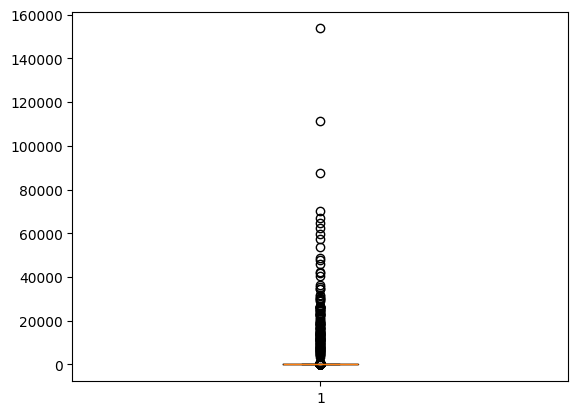

In [12]:
plt.boxplot(df_meta_subset['Resultados'])
plt.show()

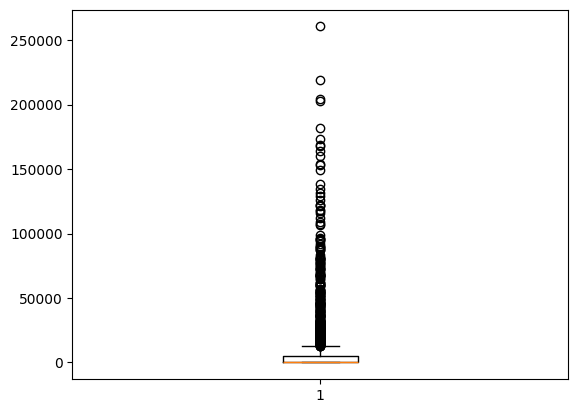

In [13]:
plt.boxplot(df_meta_subset['Impresiones'])
plt.show()

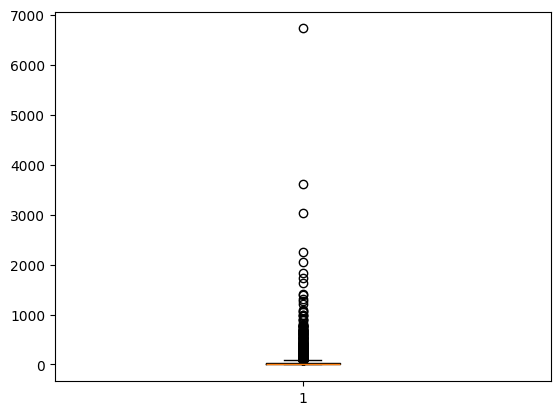

In [14]:
plt.boxplot(df_meta_subset['Clics en el enlace'])
plt.show()

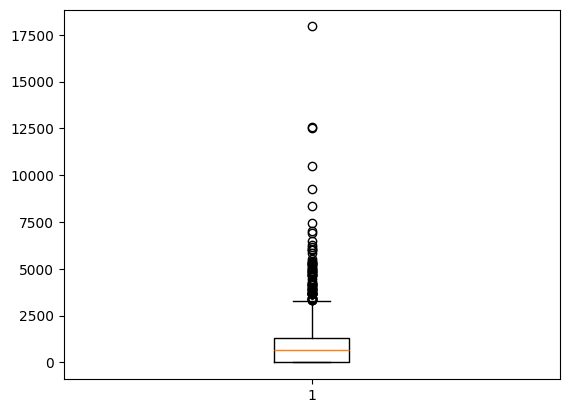

In [15]:
plt.boxplot(df_meta_subset['CPC (costo por clic en el enlace)'])
plt.show()

In [16]:
df_meta_subset = df_meta_subset.dropna(subset=['CPM (costo por mil impresiones)', 'CTR (todos)'])

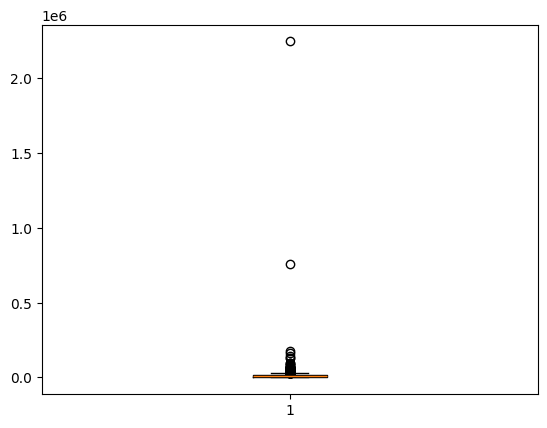

In [17]:
plt.boxplot(df_meta_subset['CPM (costo por mil impresiones)'])
plt.show()

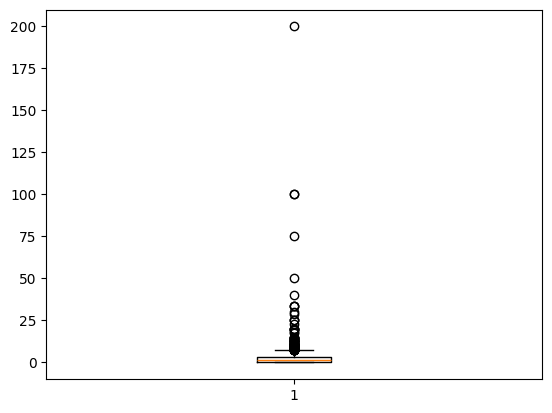

In [18]:
plt.boxplot(df_meta_subset['CTR (todos)'])
plt.show()

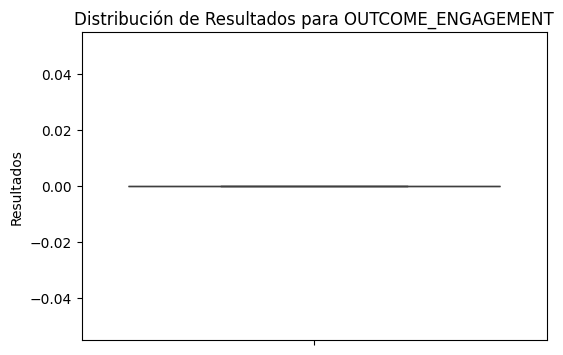

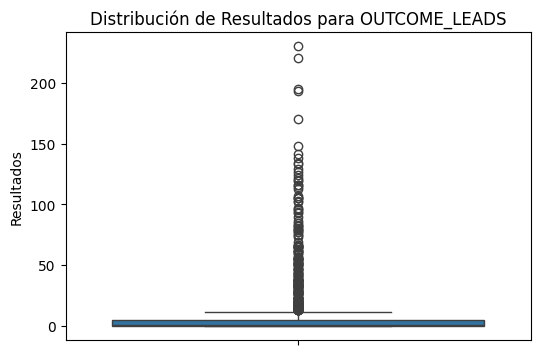

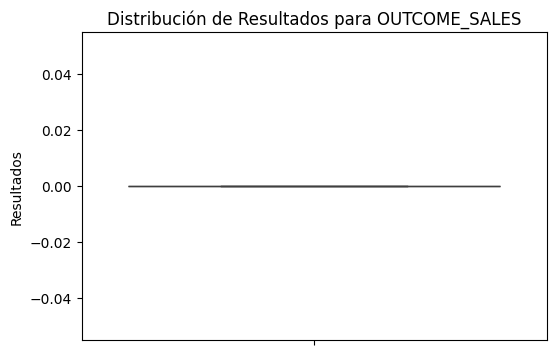

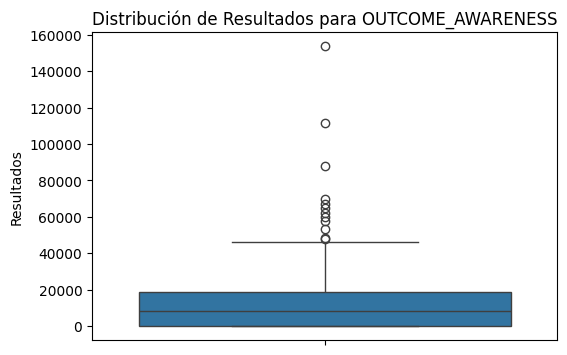

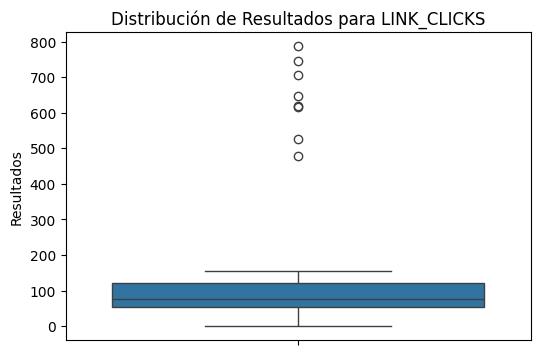

In [35]:
objetivos = df_meta_subset['Objetivo'].unique()

for obj in objetivos:
    subset = df_meta_subset[df_meta_subset['Objetivo'] == obj]
    plt.figure(figsize=(6,4))
    sns.boxplot(data=subset, y='Resultados')
    plt.title(f'Distribución de Resultados para {obj}')
    plt.show()

Text(0, 0.5, 'Cantidad de registros')

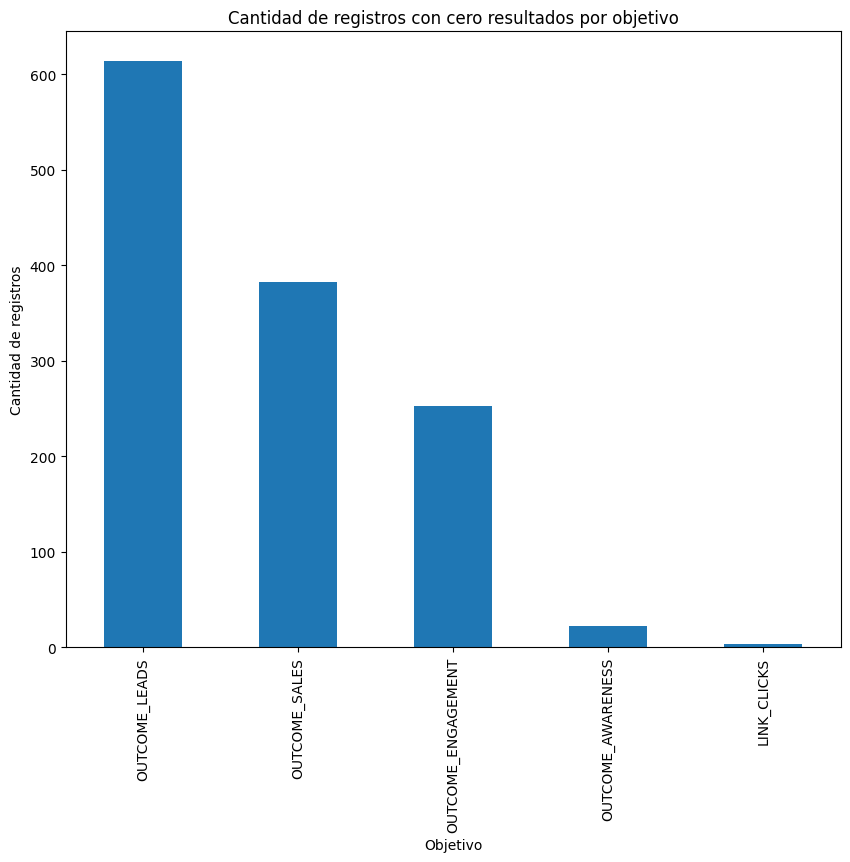

In [39]:
df_meta_subset[df_meta_subset['Resultados']==0]['Objetivo'].value_counts().plot(kind='bar',figsize=(10,8))
plt.title('Cantidad de registros con cero resultados por objetivo')
plt.xlabel('Objetivo')
plt.ylabel('Cantidad de registros')        

In [41]:
(df_meta_subset['Resultados'] == 0).mean()

np.float64(0.5748422001803426)

In [42]:
df_meta_subset.groupby("Objetivo")['Resultados'].apply(lambda x: (x==0).mean())

Objetivo
LINK_CLICKS           0.095238
OUTCOME_AWARENESS     0.101852
OUTCOME_ENGAGEMENT    1.000000
OUTCOME_LEADS         0.463396
OUTCOME_SALES         1.000000
Name: Resultados, dtype: float64

In [60]:
df_meta_filtrado=df_meta_subset.query("Objetivo not in ['OUTCOME_ENGAGEMENT', 'OUTCOME_SALES']").copy()
df_meta_filtrado['Objetivo'].unique()

array(['OUTCOME_LEADS', 'OUTCOME_AWARENESS', 'LINK_CLICKS'], dtype=object)

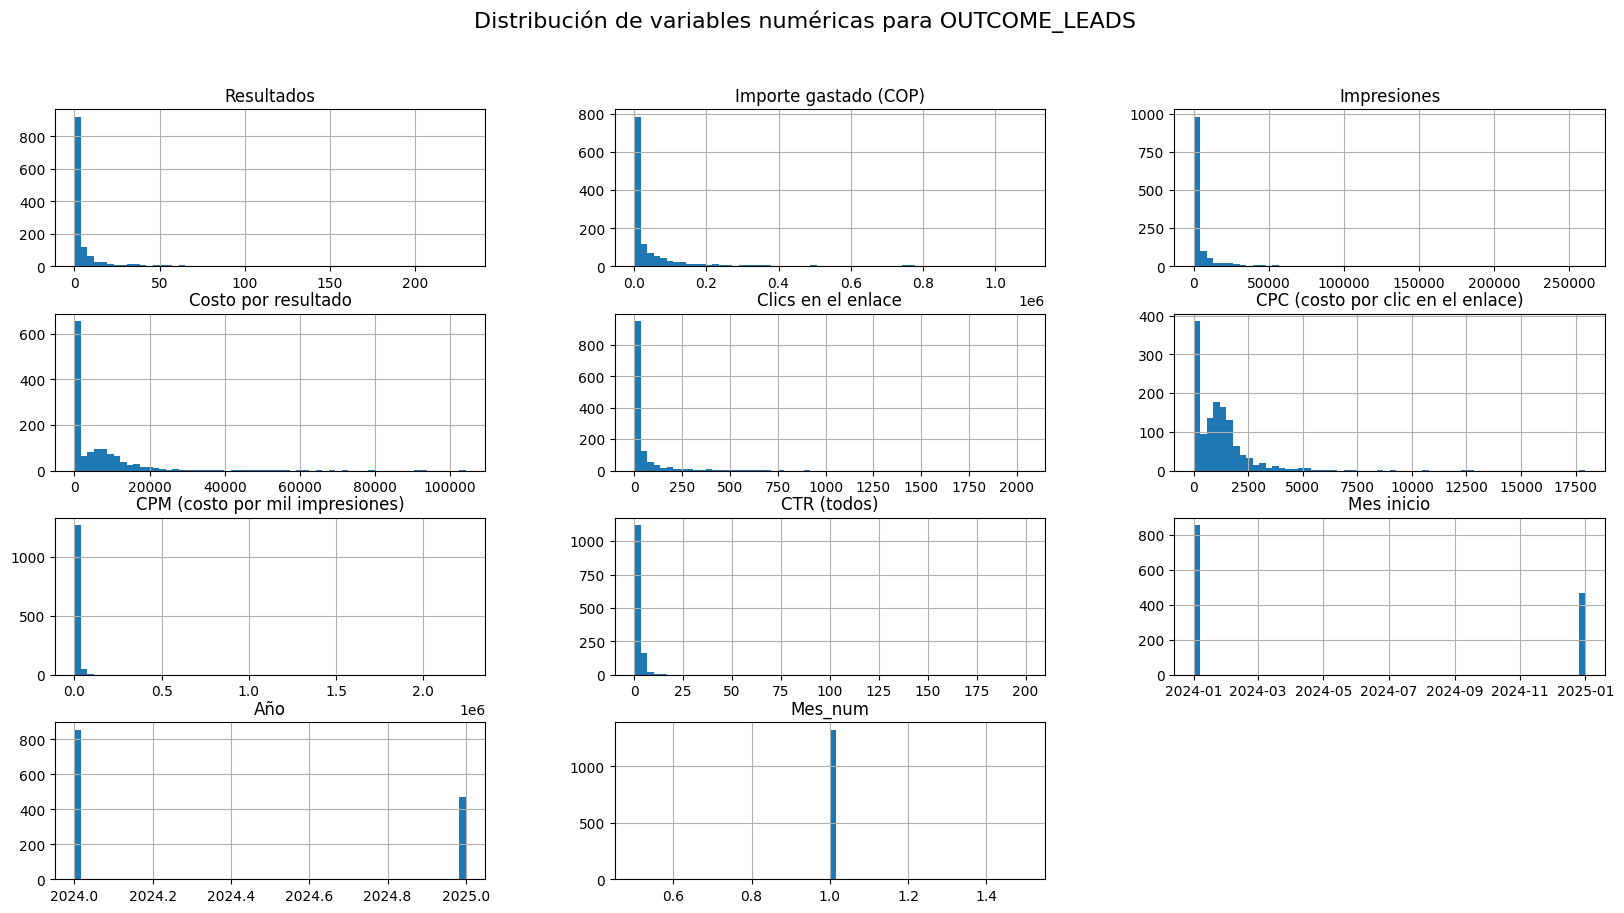

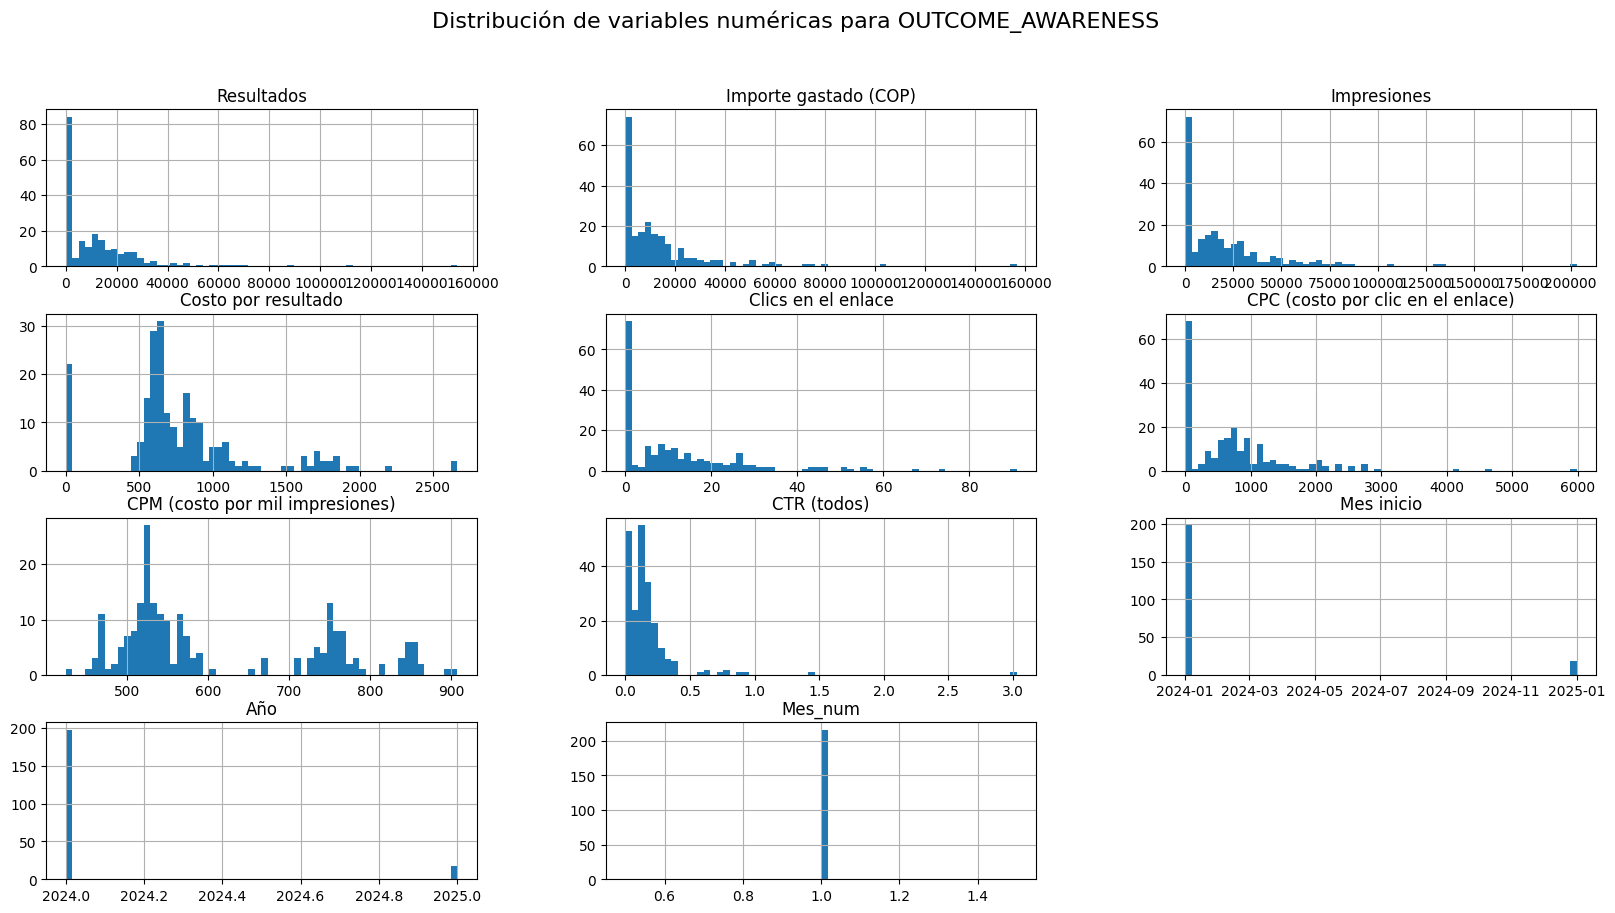

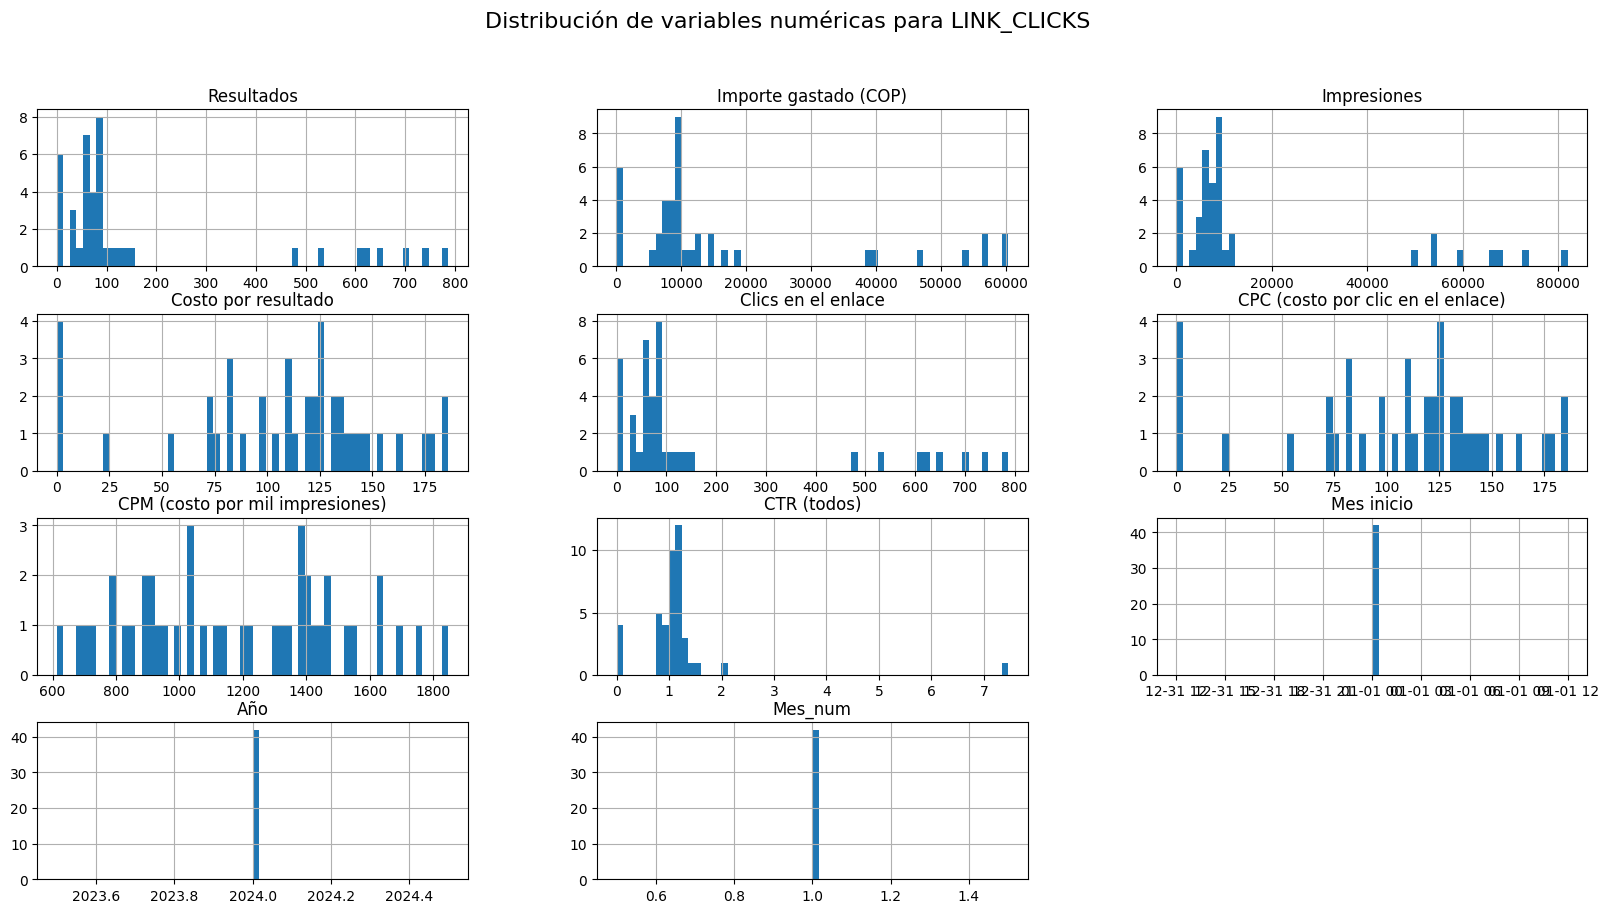

In [61]:
obj_filtrado = df_meta_filtrado['Objetivo'].unique()
cols_drop = ['Identificador de la campaña', 
             'Identificador del conjunto de anuncios', 
             'Identificador del anuncio']
for obj in obj_filtrado:
    subset = df_meta_filtrado[df_meta_filtrado['Objetivo'] == obj]
    subset = subset.drop(columns=cols_drop, errors = 'ignore')
    subset.hist(bins=60, figsize=(20,10))
    plt.suptitle(f"Distribución de variables numéricas para {obj}", fontsize=16)
    plt.show()

In [62]:
df_meta_filtrado['Mes'].sort_values().unique()

array(['2024-05-03 - 2024-05-31', '2024-06-01 - 2024-06-30',
       '2024-07-01 - 2024-07-31', '2024-08-01 - 2024-08-31',
       '2024-09-01 - 2024-09-30', '2024-10-01 - 2024-10-31',
       '2024-11-01 - 2024-11-30', '2024-12-01 - 2024-12-31',
       '2025-01-01 - 2025-01-31', '2025-02-01 - 2025-02-28',
       '2025-03-01 - 2025-03-31'], dtype=object)

In [63]:
df_meta_filtrado['Mes inicio']=df_meta_filtrado['Mes'].str.split('-').str[0]
df_meta_filtrado['Mes inicio']=pd.to_datetime(df_meta_filtrado['Mes inicio'])
df_meta_filtrado['Año']=df_meta_filtrado['Mes inicio'].dt.year
df_meta_filtrado['Mes_num']=df_meta_filtrado['Mes inicio'].dt.month

In [68]:
df_meta_filtrado.drop(columns='Mes inicio',inplace=True)

In [83]:
df_meta_filtrado['Tipo de resultado'].value_counts(dropna=False)

Tipo de resultado
Clientes potenciales de Meta    711
NaN                             640
Alcance                         194
Clics en el enlace               38
Name: count, dtype: int64

In [93]:
df_meta_filtrado.groupby('Objetivo')['Tipo de resultado'].value_counts(dropna=False)

Objetivo           Tipo de resultado           
LINK_CLICKS        Clics en el enlace               38
                   NaN                               4
OUTCOME_AWARENESS  Alcance                         194
                   NaN                              22
OUTCOME_LEADS      Clientes potenciales de Meta    711
                   NaN                             614
Name: count, dtype: int64

In [127]:
registrosna=df_meta_filtrado[(df_meta_filtrado['Tipo de resultado'].isna()
                              &(df_meta_filtrado['Objetivo'].isin(['LINK_CLICKS','OUTCOME_AWARENESS'])))]

In [120]:
df_meta_filtrado['Tipo de resultado'] = np.where(
    (df_meta_filtrado['Objetivo'] == 'LINK_CLICKS') & (df_meta_filtrado['Tipo de resultado'].isna()),
    'Clics en el enlace',
    np.where(
        (df_meta_filtrado['Objetivo'] == 'OUTCOME_AWARENESS') & (df_meta_filtrado['Tipo de resultado'].isna()),
        'Alcance',
        np.where(
            (df_meta_filtrado['Objetivo'] == 'OUTCOME_LEADS') & (df_meta_filtrado['Tipo de resultado'].isna()),
            'Clientes potenciales de Meta',
            df_meta_filtrado['Tipo de resultado'] 
        )
    )
)

In [123]:
df_meta_filtrado['Tipo de resultado'].isnull().sum()

np.int64(0)

In [143]:
cols_cat=['Edad','Sexo','Llamada a la acción','Tipo de resultado']
for cols in cols_cat:
    print('\n'f'Columna: {cols}')
    print(df_meta_filtrado[cols].value_counts())


Columna: Edad
Edad
45-54    324
35-44    323
25-34    320
55-64    290
65+      164
18-24    162
Name: count, dtype: int64

Columna: Sexo
Sexo
male       546
female     545
unknown    492
Name: count, dtype: int64

Columna: Llamada a la acción
Llamada a la acción
SIGN_UP             643
GET_QUOTE           560
LEARN_MORE          167
WATCH_MORE          144
CONTACT_US           22
WHATSAPP_MESSAGE     18
GET_OFFER            18
APPLY_NOW            11
Name: count, dtype: int64

Columna: Tipo de resultado
Tipo de resultado
Clientes potenciales de Meta    1325
Alcance                          216
Clics en el enlace                42
Name: count, dtype: int64


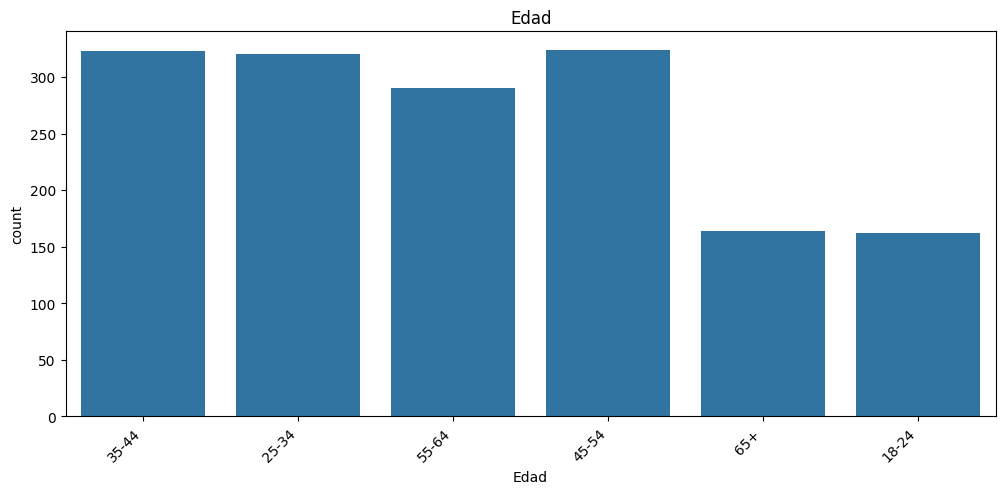

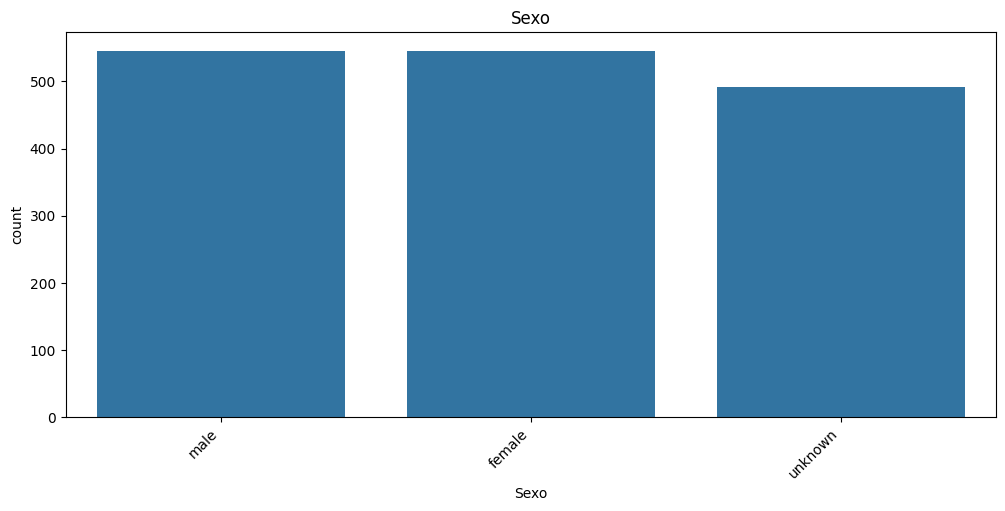

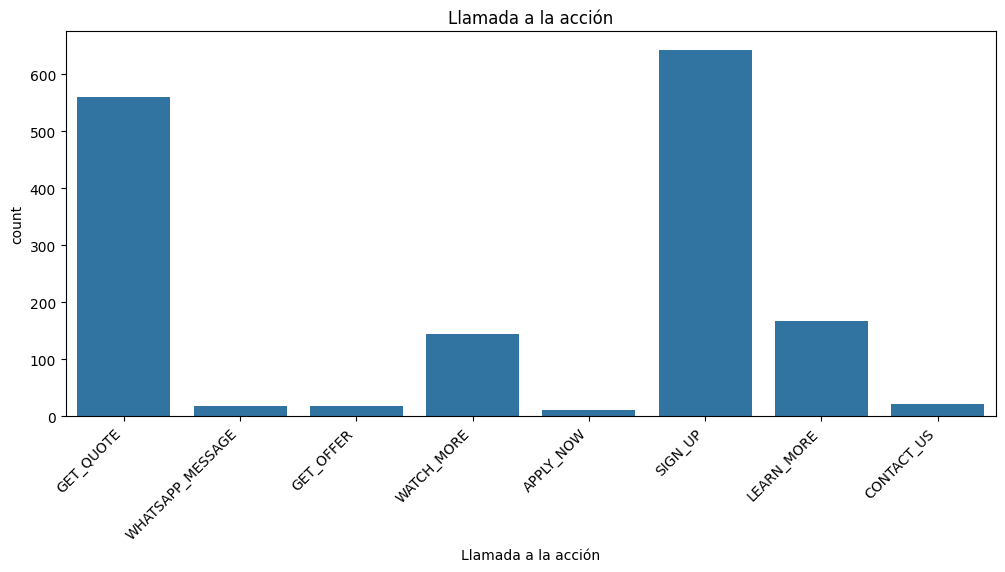

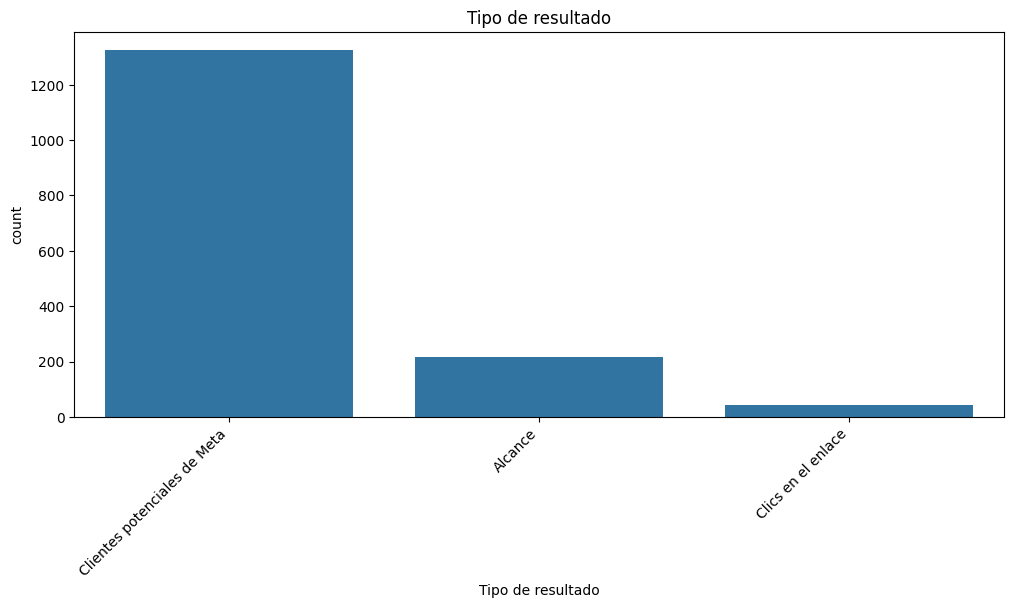

In [152]:
for cols in cols_cat:
    plt.figure(figsize=(12,5))
    sns.countplot(x=cols,data=df_meta_filtrado)
    plt.title(cols)
    plt.xticks(rotation=45,ha='right')
    plt.show()

In [155]:
df_meta_filtrado.columns

Index(['Nombre de la campaña', 'Identificador de la campaña',
       'Nombre del conjunto de anuncios',
       'Identificador del conjunto de anuncios', 'Nombre del anuncio',
       'Identificador del anuncio', 'Mes', 'Objetivo', 'Edad', 'Sexo',
       'Llamada a la acción', 'Tipo de resultado', 'Resultados',
       'Importe gastado (COP)', 'Impresiones', 'Costo por resultado',
       'Clics en el enlace', 'CPC (costo por clic en el enlace)',
       'CPM (costo por mil impresiones)', 'CTR (todos)', 'Año', 'Mes_num'],
      dtype='object')

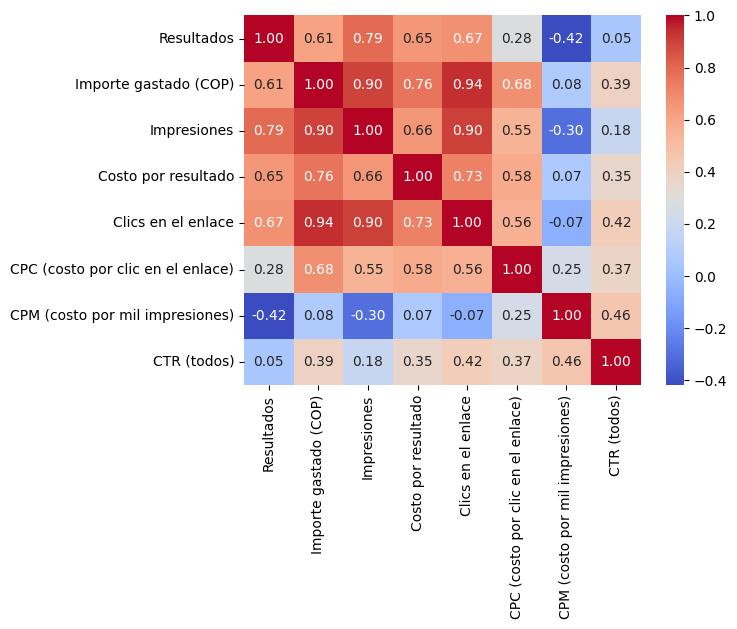

In [159]:
heatmap_list=df_meta_filtrado[['Resultados','Importe gastado (COP)','Impresiones','Costo por resultado','Clics en el enlace','CPC (costo por clic en el enlace)','CPM (costo por mil impresiones)','CTR (todos)']]
sns.heatmap(heatmap_list.corr(method='spearman'),annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [165]:
def razon_correlacion(categoria, numerica):
    categorias = pd.Categorical(categoria)
    y_avg = numerica.mean()
    ss_between = sum([len(numerica[categorias == cat]) * (numerica[categorias == cat].mean() - y_avg) ** 2 for cat in categorias.categories])
    ss_total = sum((numerica - y_avg) ** 2)
    return np.sqrt(ss_between / ss_total)

In [164]:
for cols in cols_cat:
    eta= razon_correlacion(df_meta_filtrado[cols],df_meta_filtrado['Resultados'])
    print('\n', cols)
    print("Razón de correlación: ", eta)


 Edad
Razón de correlación:  0.15890446196281435

 Sexo
Razón de correlación:  0.16242626878250024

 Llamada a la acción
Razón de correlación:  0.4989867488765569

 Tipo de resultado
Razón de correlación:  0.5468805343220676
